![alt text](images/HDAT9500Banner.PNG)
<br>

# Assessment Chapter 7

## 1.1. Bisecting K-Means

K-Means often results in clusters of widely different sizes. In this assessment you are asked to implement an extension to k-means called bisecting k-means. The algorithm proceeds as follows:

1. Pick a cluster to split (for this exercise, always pick the largest one)
2. Find 2 sub-clusters using the basic k-means algorithm (bisecting step)
3. Repeat step 2 for ITER times (for this exercise, set ITER=20) and take the split that minimizes the inertia
4. Repeat steps 1, 2 and 3 until the desired number of clusters is reached

## 1.2. Tasks

1. Implement the bisecting k-means algorithm.
2. Apply bisecting k-means to the Breast Cancer Wisconsin (Diagnostic) Data Set using the first 10 numerical features in the dataset as feature vectors (as was done in the practical exercise "Exercise 7 - PCA"). Remember to scale the data to have zero mean and unit variance before clustering. Run the algorithm three different times so that the data are divided into: (a) 2 clusters, (b) 5 clusters, (c) 10 clusters.
3. Compare the number of observations in each cluster between basic k-means and bisecting k-means when the data are divided into 10 clusters.

## 1.2. Aims:

1. Gain a better understanding of k-means and clustering algorithms in general.

## 1.3. Tips:

You are allowed to use any function that was used in the practical exercises.

In [345]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [346]:
bcw = pd.read_csv('./data/breast-cancer-wisconsin-data/data.csv', sep=',')
bcw.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


In [347]:
bcw.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [348]:
print(bcw.columns)
X = bcw[bcw.columns[2:12]]
X.describe()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [349]:
X_scaled = preprocessing.scale(X)
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

[ -1.37363271e-16   6.86816353e-17  -1.24875700e-16  -2.18532476e-16
   1.74825981e-16   1.99801121e-16   3.74627101e-17  -3.74627101e-17
   1.87313551e-16   4.52674414e-16]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


### <font color='blue'> Bisecting K-Means: First time </font> 

In [350]:
kmeans_iter1 = KMeans(n_clusters=2, init="random", n_init=1,
                     algorithm="full", max_iter=20, random_state=1)
kmeans_iter1.fit(X_scaled)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=20,
    n_clusters=2, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [351]:
print(kmeans_iter1.inertia_)

3481.48783213


In [352]:
kmeans_iter1.fit(X_scaled).cluster_centers_  

array([[ 1.11980024,  0.51196771,  1.15171294,  1.11113774,  0.6590183 ,
         1.078833  ,  1.20567732,  1.2810214 ,  0.6204109 ,  0.17839493],
       [-0.4731156 , -0.21630636, -0.48659872, -0.46945569, -0.27843523,
        -0.45580694, -0.50939867, -0.54123154, -0.2621236 , -0.07537186]])

In [353]:
kmeans_iter1.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0,

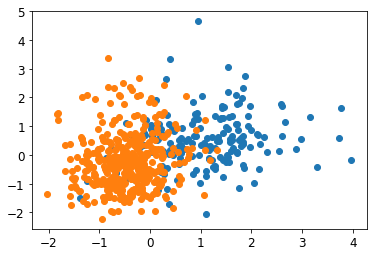

In [354]:
for i in set(kmeans_iter1.labels_):
    index = kmeans_iter1.labels_ == i
    plt.plot(X_scaled[index,0], X_scaled[index,1], 'o')
plt.show()

In [355]:
sum(kmeans_iter1.labels_ == 0)

169

In [356]:
sum(kmeans_iter1.labels_ == 1) # the larger cluster

400

In [357]:
temp = pd.DataFrame(X_scaled)
temp.head(12)
temp['kmeans_iter1.labels'] = kmeans_iter1.labels_ 
temp.head(12)

,0,1,2,3,4,5,6,7,8,9,kmeans_iter1.labels
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,0
5,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,1.005402,1.890005,0
6,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,-0.064325,-0.762332,0
7,-0.118517,0.358450,-0.072867,-0.218965,1.604049,1.140102,0.061026,0.281950,1.403355,1.660353,0
8,-0.320167,0.588830,-0.184080,-0.384207,2.201839,1.684010,1.219096,1.150692,1.965600,1.572462,0
9,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,2.783096,0


In [358]:
new_X_dat = temp[temp["kmeans_iter1.labels"] == 1]
new_X_dat.head(5)
new_X_dat.shape # matches with sum(kmeans_iter1.labels_ == 1)

(400, 11)

In [359]:
new_X_2 = new_X_dat[new_X_dat.columns[0:9]]
new_X_2.describe()

,0,1,2,3,4,5,6,7,8
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,-0.473116,-0.216306,-0.486599,-0.469456,-0.278435,-0.455807,-0.509399,-0.541232,-0.262124
std,0.558937,0.940810,0.535768,0.444853,0.892585,0.587330,0.470864,0.432090,0.863526
min,-2.029648,-2.229249,-1.984504,-1.454443,-3.112085,-1.610136,-1.114873,-1.261820,-2.744117
25%,-0.812221,-0.855115,-0.827677,-0.758847,-0.900619,-0.889033,-0.831413,-0.832672,-0.824634
50%,-0.487735,-0.307091,-0.508453,-0.515036,-0.373283,-0.537388,-0.613741,-0.605492,-0.345447
75%,-0.131297,0.242097,-0.159160,-0.226217,0.294605,-0.060474,-0.270080,-0.302348,0.268824
max,1.329956,3.378983,1.191672,1.271629,2.899260,2.199490,2.814833,0.668344,3.400421


### <font color='blue'> Bisecting K-Means: Second time </font> 

In [360]:
kmeans_iter2 = KMeans(n_clusters=2, init="random", n_init=1,
                     algorithm="full", max_iter=20, random_state=1)
kmeans_iter2.fit(new_X_2)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=20,
    n_clusters=2, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [361]:
print(kmeans_iter2.inertia_)

1226.42973235


In [362]:
kmeans_iter2.fit(new_X_2).cluster_centers_  

array([[-0.28359969,  0.03965307, -0.32183894, -0.31560725, -0.86105716,
        -0.73151493, -0.63084034, -0.64823418, -0.7423345 ],
       [-0.68049165, -0.49638762, -0.6668856 , -0.63780295,  0.35909348,
        -0.15411601, -0.37651223, -0.42414488,  0.26334277]])

In [363]:
kmeans_iter2.predict(new_X_2)

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0,

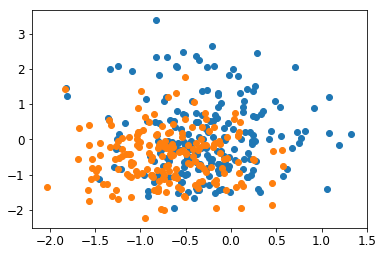

In [364]:
for i in set(kmeans_iter2.labels_):
    index = kmeans_iter2.labels_ == i
    plt.plot(new_X_2.values[index,0], new_X_2.values[index,1], 'o')
plt.show()

In [344]:
print(sum(kmeans_iter2.labels_ == 0), sum(kmeans_iter2.labels_ == 1)) # label = 0 has highest number of clusters

209 191


In [367]:
temp = pd.DataFrame(new_X_2)
temp.head(12)
temp['kmeans_iter2.labels'] = kmeans_iter2.labels_ 
temp.head(12)

,0,1,2,3,4,5,6,7,8,kmeans_iter2.labels
10,0.537556,0.919273,0.442011,0.406453,-1.017686,-0.713542,-0.700684,-0.404686,-1.035476,0
11,0.469393,-0.325708,0.479082,0.358672,0.052642,0.471115,0.134849,0.442131,0.110921,1
13,0.489274,1.084495,0.483201,0.363507,-0.878913,-0.078478,0.132840,0.121770,0.129175,0
16,0.156977,0.195555,0.114137,0.084216,0.164372,-0.612909,-0.186433,0.094686,-0.823721,0
19,-0.166799,-1.147162,-0.185728,-0.251957,0.101747,-0.436850,-0.278210,-0.028609,0.267911,1
20,-0.297446,-0.833008,-0.261106,-0.383638,0.792763,0.429422,-0.541362,-0.459627,0.567289,1
21,-1.313080,-1.593959,-1.302806,-1.083572,0.429819,-0.747086,-0.743748,-0.726337,0.012345,1
31,-0.649623,-0.137215,-0.578271,-0.609460,1.034726,0.895628,0.414323,0.074825,1.786704,1
36,0.034851,0.565559,0.068416,-0.062255,0.133059,0.103456,0.541128,0.182128,0.267911,1
37,-0.311646,-0.202373,-0.385500,-0.372831,-0.464730,-1.263703,-0.793214,-0.507861,-1.258183,0


In [369]:
new_X_dat = temp[temp["kmeans_iter2.labels"] == 0]
new_X_dat.head(5)
new_X_dat.shape # matches with sum(kmeans_iter2.labels_ == 0)

(209, 10)

In [370]:
new_X_3 = new_X_dat[new_X_dat.columns[0:9]]
new_X_3.describe()

,0,1,2,3,4,5,6,7,8
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,-0.283600,0.039653,-0.321839,-0.315607,-0.861057,-0.731515,-0.630840,-0.648234,-0.742335
std,0.539806,1.038149,0.520396,0.452593,0.575190,0.420886,0.357717,0.376449,0.615452
min,-1.817206,-1.950000,-1.814389,-1.354046,-3.112085,-1.610136,-1.114873,-1.261820,-2.744117
25%,-0.621222,-0.728290,-0.630582,-0.604056,-1.190618,-1.024157,-0.899681,-0.919018,-1.097542
50%,-0.311646,-0.113944,-0.338956,-0.365436,-0.838349,-0.796739,-0.695035,-0.673717,-0.768957
75%,0.026330,0.635371,-0.024262,-0.088136,-0.503871,-0.483471,-0.432134,-0.466075,-0.367353
max,1.329956,3.378983,1.191672,1.271629,0.621966,0.543131,0.435666,0.668344,1.158741


### <font color='blue'> Bisecting K-Means: Third time </font> 

In [372]:
kmeans_iter3 = KMeans(n_clusters=2, init="random", n_init=1,
                     algorithm="full", max_iter=20, random_state=1)
kmeans_iter3.fit(new_X_3)
print(kmeans_iter3.inertia_)

458.590210433


In [374]:
kmeans_iter3.fit(new_X_3).cluster_centers_  

array([[-0.03420047,  0.9111687 , -0.07090675, -0.10163751, -0.71172351,
        -0.51554464, -0.44077668, -0.4389622 , -0.56286723],
       [-0.46144995, -0.58183758, -0.50078238, -0.46819222, -0.96754919,
        -0.88552653, -0.76637754, -0.79746913, -0.87031526]])

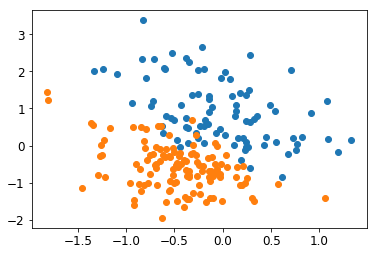

In [375]:
for i in set(kmeans_iter3.labels_):
    index = kmeans_iter3.labels_ == i
    plt.plot(new_X_3.values[index,0], new_X_3.values[index,1], 'o')
plt.show()

<font color='blue'> I could go on like this until 10 clusters are achieved. However, I understand that would not be the target of this assessment. I made an attempt to define a function to do the steps I applied above. However, it does not seem to work. </font> 

In [412]:
def bisect_k_mean (data, k_max, n_clusters, max_iter):
    kmeans_iter = KMeans(n_clusters=n_clusters, init="random", n_init=1,
                     algorithm="full", max_iter=max_iter, random_state=1)
    for i in range(k_max):
        kmeans_iter = kmeans_iter[i]
    kmeans_iter[[i]].fit(data)
    temp = pd.DataFrame(data)
    temp['kmeans_iter[[i]].labels'] = kmeans_iter[[i]].labels_
    if sum(kmeans_iter[[i]].labels_ == 0) > sum(kmeans_iter[[i]].labels_ == 1):
        new_dat = temp[temp["kmeans_iter[[i]].labels"] == 0]
        data = new_dat[new_dat.columns[0:9]]
    else:
        new_dat = temp[temp["kmeans_iter[[i]].labels"] == 1]
        data = new_dat[new_dat.columns[0:9]]
      
    print(kmeans_iter[[i]],kmeans_iter[[i]].inertia_)


In [413]:
bisect_k_mean(X_scaled, 10, 2, 20)

TypeError: 'KMeans' object does not support indexing

<font color='blue'> The plan was to get all the *kmeans_iter[i]* values and then compare their inertias. Then the number of observations in each cluster could have been compared. Unfortunately, I am still weak in devising functions in python. </font>